<a href="https://colab.research.google.com/github/SenaEnana/BigDataAsignment/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv'
df = pd.read_csv(url)

# Display the first few rows to understand the structure of the data
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
# Convert 'reservation_status_date' to datetime type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values based on your analysis requirements
# For example, you might fill missing values in 'agent' and 'company' with appropriate values
df['agent'].fillna(value=0, inplace=True)
df['company'].fillna(value=0, inplace=True)

# Drop rows with missing values in other columns if necessary
# df.dropna(subset=['column_name'], inplace=True)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
# Rename columns if needed but no need to rename
# df.rename(columns={'old_name': 'new_name'}, inplace=True)

31994


In [ ]:
# Check the number of records
print("Number of Records:", len(df))

Number of Records: 87396


Overall Cancellation Rate: 0.27489816467572886


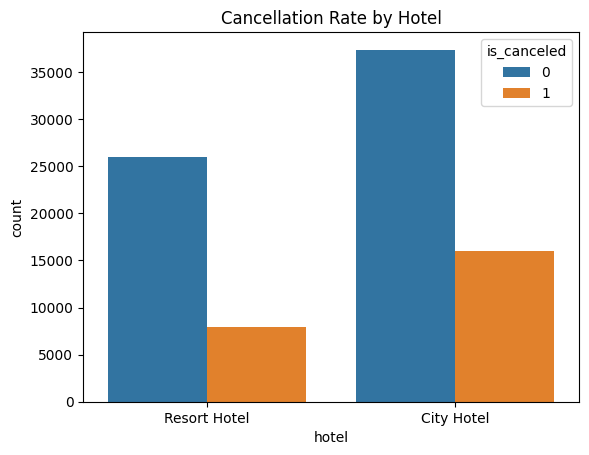

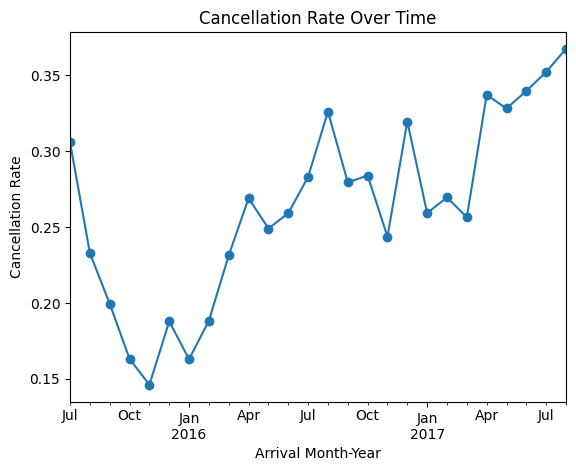

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cancellation Rate
cancellation_rate = df['is_canceled'].mean()
print("Overall Cancellation Rate:", cancellation_rate)

# Cancellation Rate by Hotel
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Hotel')
plt.show()

# Cancellation Rate Over Time
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) +
                                     '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['arrival_month_year'] = df['arrival_date'].dt.to_period('M')
cancellation_over_time = df.groupby('arrival_month_year')['is_canceled'].mean()
cancellation_over_time.plot(kind='line', marker='o')
plt.title('Cancellation Rate Over Time')
plt.xlabel('Arrival Month-Year')
plt.ylabel('Cancellation Rate')
plt.show()

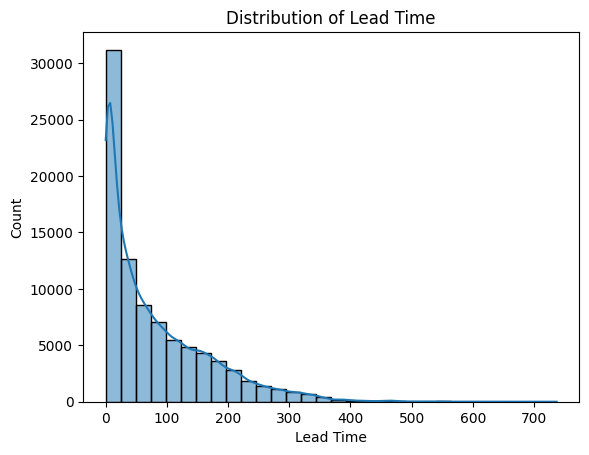

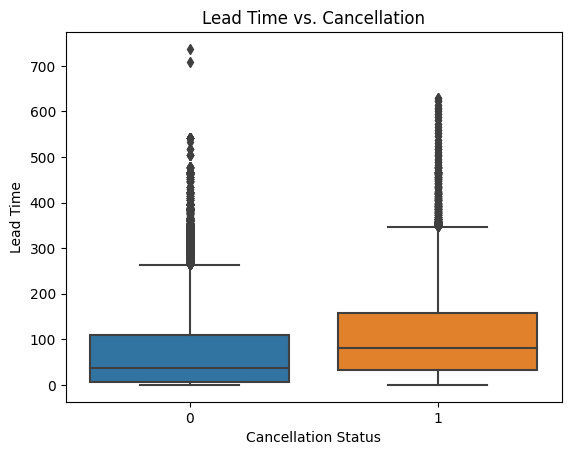

In [ ]:
# Distribution of Lead Time
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()

# Lead Time vs. Cancellation
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.show()

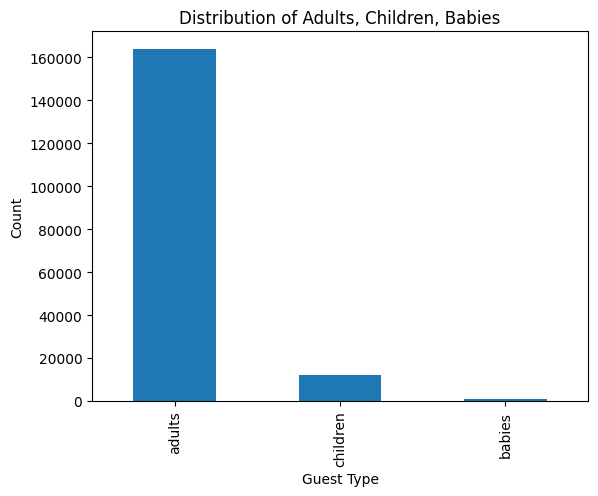

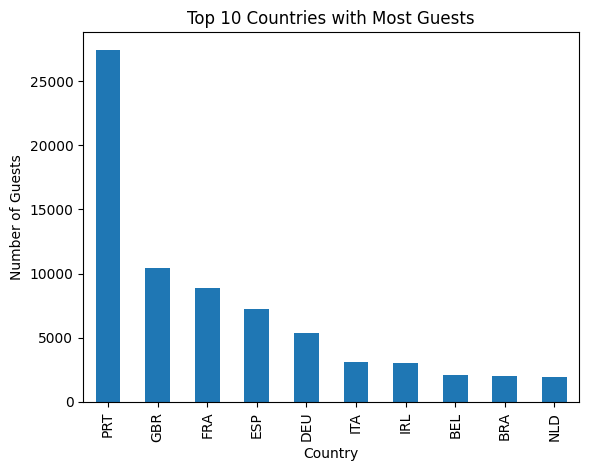

In [ ]:
# Distribution of Adults, Children, Babies
df[['adults', 'children', 'babies']].sum().plot(kind='bar')
plt.title('Distribution of Adults, Children, Babies')
plt.xlabel('Guest Type')
plt.ylabel('Count')
plt.show()

# Composition of Guests by Country
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with Most Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.show()

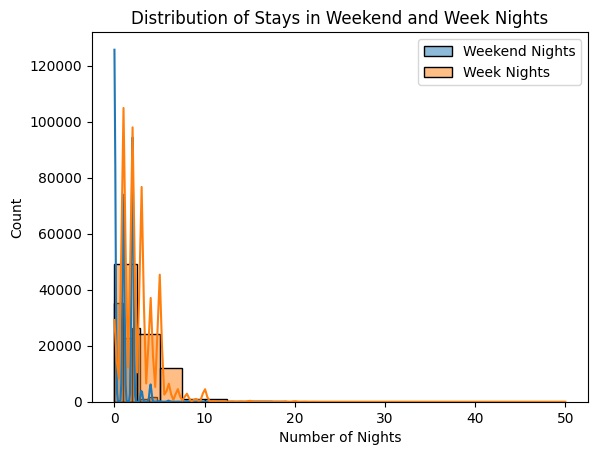

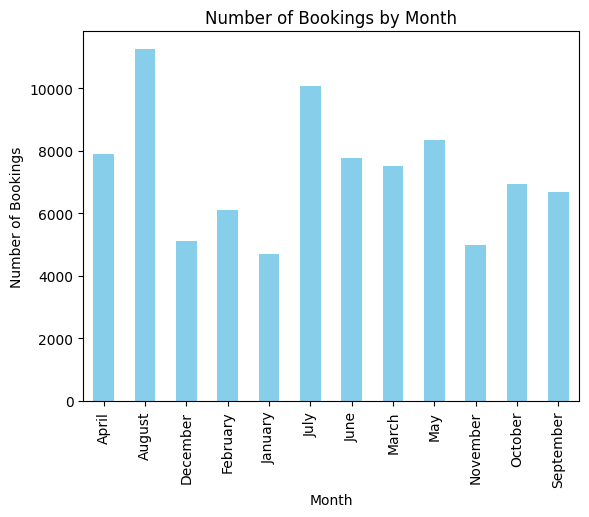

In [ ]:
# Distribution of stays in weekend nights and stays in week nights
sns.histplot(df['stays_in_weekend_nights'], bins=20, kde=True, label='Weekend Nights')
sns.histplot(df['stays_in_week_nights'], bins=20, kde=True, label='Week Nights')
plt.title('Distribution of Stays in Weekend and Week Nights')
plt.xlabel('Number of Nights')
plt.ylabel('Count')
plt.legend()
plt.show()

# Popular Months for Bookings
bookings_by_month = df['arrival_date_month'].value_counts().sort_index()
bookings_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

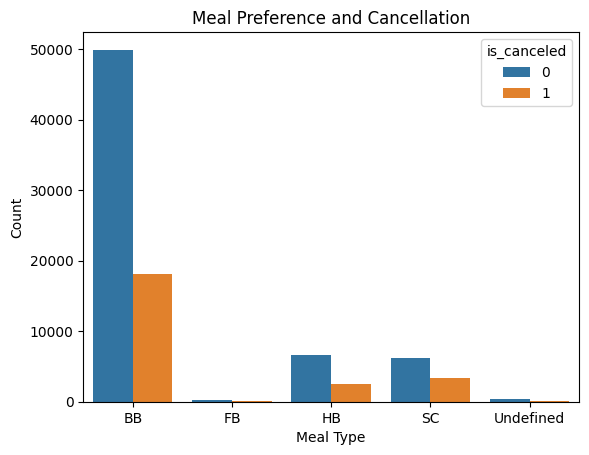

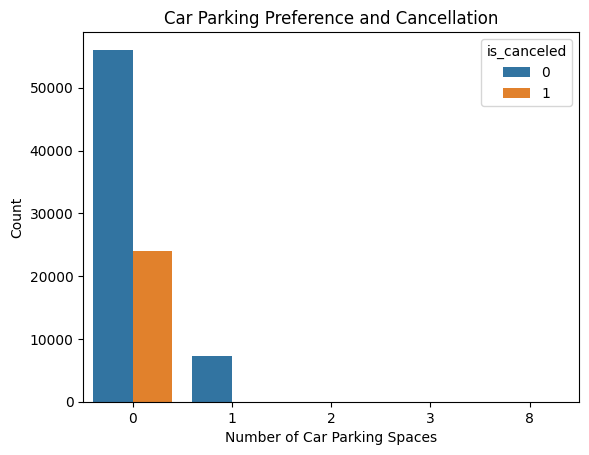

In [ ]:
# Meal Preference
sns.countplot(x='meal', hue='is_canceled', data=df)
plt.title('Meal Preference and Cancellation')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

# Car Parking Preference
sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df)
plt.title('Car Parking Preference and Cancellation')
plt.xlabel('Number of Car Parking Spaces')
plt.ylabel('Count')
plt.show()

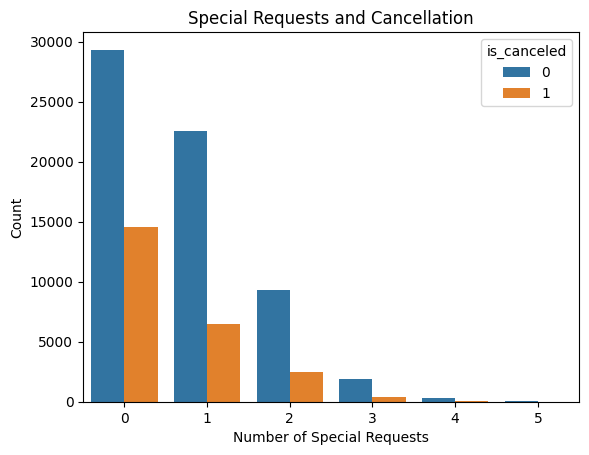

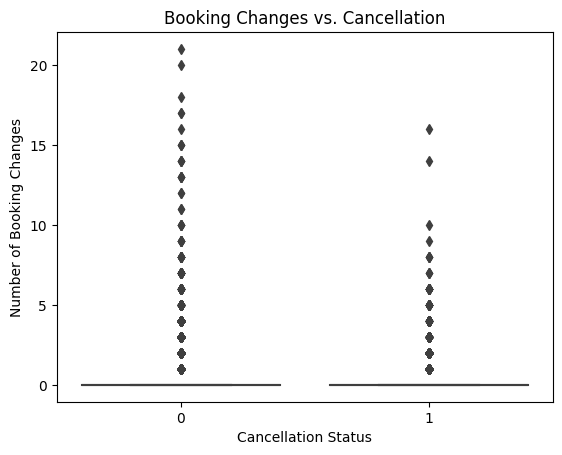

In [ ]:
# Distribution of Special Requests
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df)
plt.title('Special Requests and Cancellation')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

# Booking Changes vs. Cancellation
sns.boxplot(x='is_canceled', y='booking_changes', data=df)
plt.title('Booking Changes vs. Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Number of Booking Changes')
plt.show()

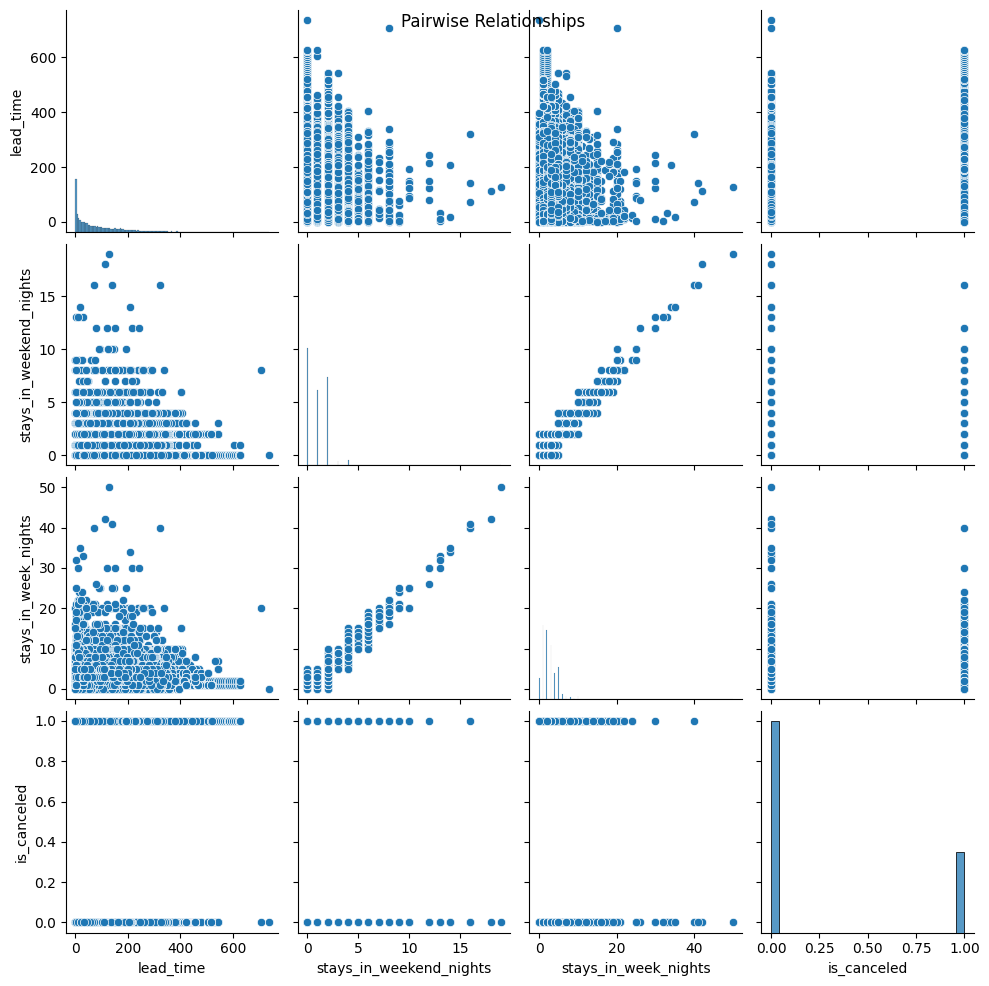

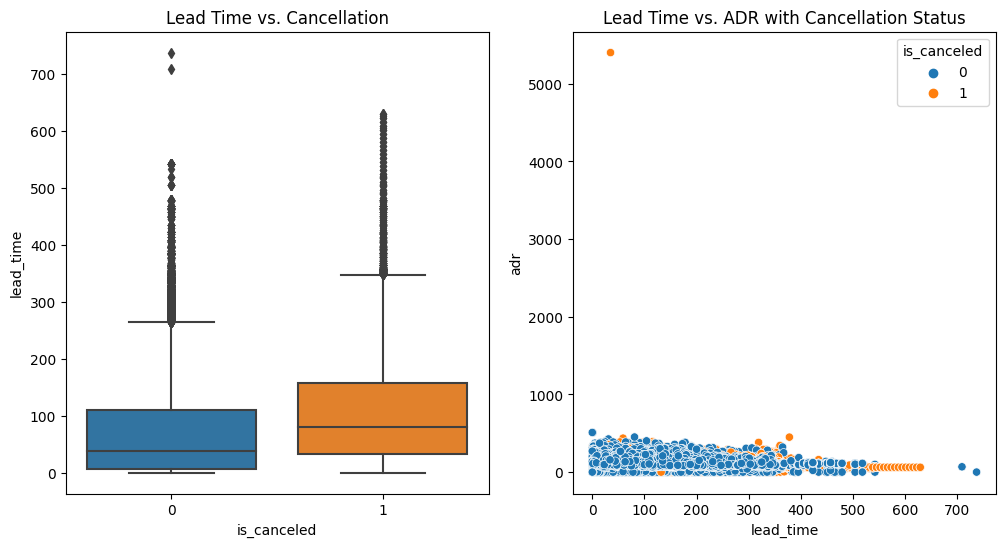

Correlation Matrix:
                         lead_time  stays_in_weekend_nights  \
lead_time                 1.000000                 0.235145   
stays_in_weekend_nights   0.235145                 1.000000   
stays_in_week_nights      0.310129                 0.555552   

                         stays_in_week_nights  
lead_time                            0.310129  
stays_in_weekend_nights              0.555552  
stays_in_week_nights                 1.000000  


In [ ]:
# Example: Exploration of Multiple Variables
sns.pairplot(df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']])
plt.suptitle('Pairwise Relationships')
plt.show()

# Example: Variety of Visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs. Cancellation')

plt.subplot(1, 2, 2)
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled', data=df)
plt.title('Lead Time vs. ADR with Cancellation Status')

plt.show()

# Example: Relevant Statistics
correlation_matrix = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
